# Machine learning con Python y Scikit-learn

**Joaquín Amat Rodrigo** - Agosto, 2020 (actualizado Febrero 2023)

## Etapas de un problema de machine learning

* Definir el problema: ¿Qué se pretende predecir? ¿De qué datos se dispone? o ¿Qué datos es necesario conseguir?

* Explorar y entender los datos que se van a emplear para crear el modelo.

* Métrica de éxito: definir una forma apropiada de cuantificar cómo de buenos son los resultados obtenidos.

* Preparar la estrategia para evaluar el modelo: separar las observaciones en un conjunto de entrenamiento, un conjunto de validación (o validación cruzada) y un conjunto de test. Es muy importante asegurar que ninguna información del conjunto de test participa en el proceso de entrenamiento del modelo.

* Preprocesar los datos: aplicar las transformaciones necesarias para que los datos puedan ser interpretados por el algoritmo de machine learning seleccionado.

* Ajustar un primer modelo capaz de superar unos resultados mínimos. Por ejemplo, en problemas de clasificación, el mínimo a superar es el porcentaje de la clase mayoritaria (la moda). En un modelo de regresión, la media de la variable respuesta.

* Gradualmente, mejorar el modelo incorporando-creando nuevas variables u optimizando los hiperparámetros.

* Evaluar la capacidad del modelo final con el conjunto de test para tener una estimación de la capacidad que tiene el modelo cuando predice nuevas observaciones.

* Entrenar el modelo final con todos los datos disponibles.

# Preparacion de librerías

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns # 
import statsmodels.api as sm

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

from sklearn.ensemble import RandomForestRegressor

# from skopt.space import Real, Integer
# from skopt.utils import use_named_args
# from skopt import gp_minimize
# from skopt.plots import plot_convergence
# import optuna

# Varios
# ==============================================================================
import multiprocessing # 
import random
from itertools import product
from fitter import Fitter, get_common_distributions

In [2]:
# Configuración matplotlib graficas
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings 
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## data

El set de datos *SaratogaHouses* del paquete mosaicData de R contiene información sobre el precio de 1728 viviendas situadas en Saratoga County, New York, USA en el año 2006. Además del precio, incluye 15 variables adicionales:

* price: precio de la vivienda.
* lotSize: metros cuadrados de la vivienda.
* age: antigüedad de la vivienda.
* landValue: valor del terreno.
* livingArea: metros cuadrados habitables.
* pctCollege: porcentaje del vecindario con título universitario.
* bedrooms: número de dormitorios.
* firplaces: número de chimeneas.
* bathrooms: número de cuartos de baño (el valor 0.5 hace referencia a cuartos de baño sin ducha).
* rooms: número de habitaciones.
* heating: tipo de calefacción.
* fuel: tipo de alimentación de la calefacción (gas, electricidad o diesel).
* sewer: tipo de desagüe.
* waterfront: si la vivienda tiene vistas al lago.
* newConstruction: si la vivienda es de nueva construcción.
* centralAir: si la vivienda tiene aire acondicionado.

In [3]:
# en una direccion web url se encuentra el archivo
url = (
    "https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/"
    "master/data/SaratogaHouses.csv"
)
# lea de la direccion el archivo
datos = pd.read_csv(url, sep=",")

In [4]:
# revisar que datos se leyeron (qué y cómo?)
datos.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [5]:
datos.columns

Index(['price', 'lotSize', 'age', 'landValue', 'livingArea', 'pctCollege',
       'bedrooms', 'fireplaces', 'bathrooms', 'rooms', 'heating', 'fuel',
       'sewer', 'waterfront', 'newConstruction', 'centralAir'],
      dtype='object')

In [6]:
# definir un nuevo nombre de columnas
listados_nuevo_nombre_cols = ["precio", "metros_totales", "antiguedad", "precio_terreno", "metros_habitables",
                 "universitarios", "dormitorios", "chimenea", "banyos", "habitaciones",
                 "calefaccion","consumo_calefacion", "desague", "vistas_lago", "nueva_construccion",
                 "aire_acondicionado"]

# Se renombran las columnas para que sean más descriptivas
datos.columns = listados_nuevo_nombre_cols

In [7]:
datos.columns

Index(['precio', 'metros_totales', 'antiguedad', 'precio_terreno',
       'metros_habitables', 'universitarios', 'dormitorios', 'chimenea',
       'banyos', 'habitaciones', 'calefaccion', 'consumo_calefacion',
       'desague', 'vistas_lago', 'nueva_construccion', 'aire_acondicionado'],
      dtype='object')

## exploratorio

Este proceso permite entender mejor qué información contiene cada variable, así como detectar posibles errores. Algunos ejemplos frecuentes son:

* Que una columna se haya almacenado con el tipo incorrecto: una variable numérica está siendo reconocida como texto o viceversa.
* Que una variable contenga valores que no tienen sentido: por ejemplo, para indicar que no se dispone del precio de una vivienda se introduce el valor 0 o un espacio en blanco.
* Que en una variable de tipo numérico se haya introducido una palabra en lugar de un número.

In [8]:
datos.head(4)

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No


In [9]:
# Tipo de cada columna
# ==============================================================================
# En pandas, el tipo "object" hace referencia a strings
# datos.dtypes
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   float64
 2   antiguedad          1728 non-null   int64  
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1728 non-null   int64  
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   chimenea            1728 non-null   int64  
 8   banyos              1728 non-null   float64
 9   habitaciones        1728 non-null   int64  
 10  calefaccion         1728 non-null   object 
 11  consumo_calefacion  1728 non-null   object 
 12  desague             1728 non-null   object 
 13  vistas_lago         1728 non-null   object 
 14  nueva_construccion  1728 non-null   object 
 15  aire_acondicionado  1728 non-null   object 
dtypes: flo

In [10]:
# Dimensiones del dataset
# ==============================================================================
datos.shape

(1728, 16)

In [11]:
# Número de datos ausentes por variable
# ==============================================================================
datos.isna().sum().sort_values() # indicar que columnas necesitan estrategia de tratamiento de vacios

precio                0
metros_totales        0
antiguedad            0
precio_terreno        0
metros_habitables     0
universitarios        0
dormitorios           0
chimenea              0
banyos                0
habitaciones          0
calefaccion           0
consumo_calefacion    0
desague               0
vistas_lago           0
nueva_construccion    0
aire_acondicionado    0
dtype: int64

### Variable respuesta

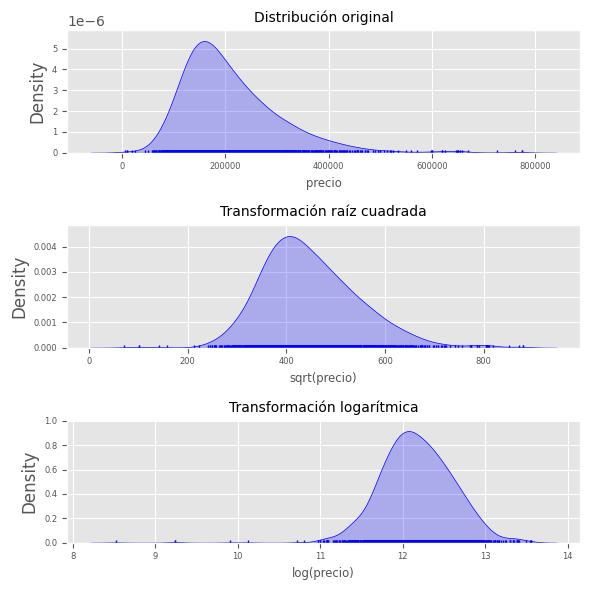

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.kdeplot(
    datos.precio,
    fill    = True,
    color   = "blue",
    ax      = axes[0]
)
sns.rugplot(
    datos.precio,
    color   = "blue",
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.kdeplot(
    np.sqrt(datos.precio),
    fill    = True,
    color   = "blue",
    ax      = axes[1]
)
sns.rugplot(
    np.sqrt(datos.precio),
    color   = "blue",
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.kdeplot(
    np.log(datos.precio),
    fill    = True,
    color   = "blue",
    ax      = axes[2]
)
sns.rugplot(
    np.log(datos.precio),
    color   = "blue",
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

Algunos modelos de machine learning y aprendizaje estadístico requieren que la variable respuesta se distribuya de una forma determinada. Por ejemplo, para los modelos de regresión lineal (LM), la distribución tiene que ser de tipo normal. Para los modelos lineales generalizados (GLM), la distribución tiene que ser de la familia exponencial.

Existen varias librerías en python que permiten identificar a qué distribución se ajustan mejor los datos, una de ellas es fitter. Esta librería permite ajustar cualquiera de las 80 distribuciones implementadas en scipy.

In [13]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(datos.precio, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 11.54it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,2.497420e-11,3068.852573,-55037.908642,inf,0.051274,2.180145e-04
logistic,4.913880e-11,3147.967042,-53883.297844,inf,0.071310,4.368626e-08
cauchy,5.221450e-11,2956.669693,-53778.388707,inf,0.121728,9.001774e-23
chi2,5.835610e-11,3315.562140,-53578.774007,inf,0.094392,7.513341e-14
norm,6.947514e-11,3324.534158,-53284.856663,inf,0.104149,8.972690e-17
expon,2.915346e-10,2824.103160,-50806.577128,inf,0.316530,2.028906e-154
powerlaw,3.132284e-10,2728.809479,-50675.096807,inf,0.344929,3.981254e-184
exponpow,4.841645e-10,inf,-49922.566370,NaN,1.000000,0.000000e+00
gamma,4.841645e-10,inf,-49922.566370,3.958212,0.947917,0.000000e+00


### Variables numéricas

In [14]:
# Variables numéricas
# ==============================================================================
datos.select_dtypes(include=['float64', 'int']).describe()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


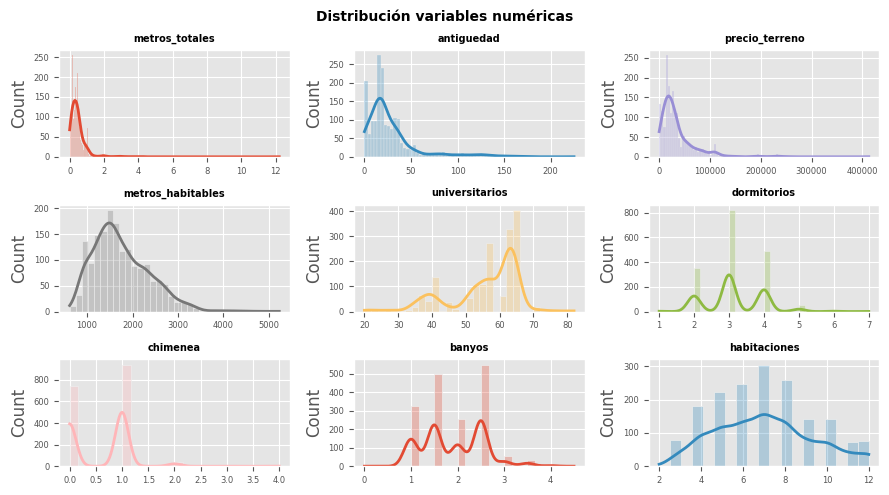

In [15]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = datos,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

La variable chimenea, aunque es de tipo numérico, apenas toma unos pocos valores y la gran mayoría de observaciones pertenecen a solo dos de ellos. En casos como este, suele ser conveniente tratar la variable como cualitativa.

In [16]:
# Valores observados de chimenea
# ==============================================================================
datos.chimenea.value_counts()

chimenea
1    942
0    740
2     42
4      2
3      2
Name: count, dtype: int64

In [17]:
# Se convierte la variable chimenea tipo string
# ==============================================================================
datos.chimenea = datos.chimenea.astype("str")

Como el objetivo del estudio es predecir el precio de las viviendas, el análisis de cada variable se hace también en relación a la variable respuesta precio. Analizando los datos de esta forma, se pueden empezar a extraer ideas sobre qué variables están más relacionadas con el precio y de qué forma.

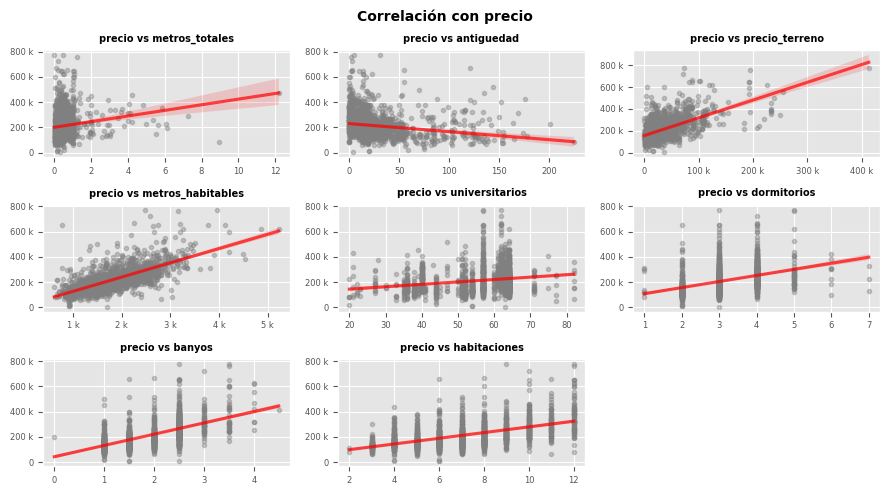

In [18]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = datos[colum],
        y           = datos['precio'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");

### Correlación variables numéricas

Algunos modelos (LM, GLM, ...) se ven perjudicados si incorporan predictores altamente correlacionados. Por esta razón, es conveniente estudiar el grado de correlación entre las variables disponibles.

In [19]:
# Correlación entre columnas numéricas
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
44,metros_habitables,habitaciones,0.733666,0.733666
76,habitaciones,metros_habitables,0.733666,0.733666
67,banyos,metros_habitables,0.718564,0.718564
43,metros_habitables,banyos,0.718564,0.718564
36,metros_habitables,precio,0.712390,0.712390
4,precio,metros_habitables,0.712390,0.712390
78,habitaciones,dormitorios,0.671863,0.671863
62,dormitorios,habitaciones,0.671863,0.671863
42,metros_habitables,dormitorios,0.656196,0.656196
58,dormitorios,metros_habitables,0.656196,0.656196


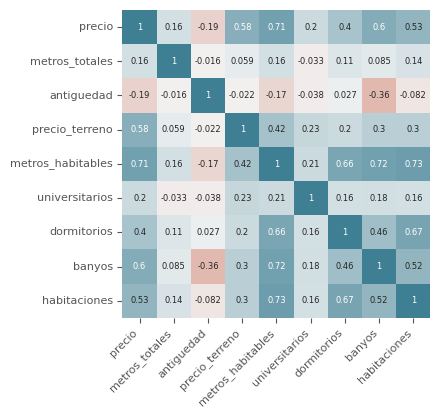

In [20]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

### Variables cualitativas

In [21]:
# Variables cualitativas (tipo object)
# ==============================================================================
datos.select_dtypes(include=['object']).describe()

,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,1728,1728,1728,1728,1728,1728,1728
unique,5,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,942,1121,1197,1213,1713,1647,1093


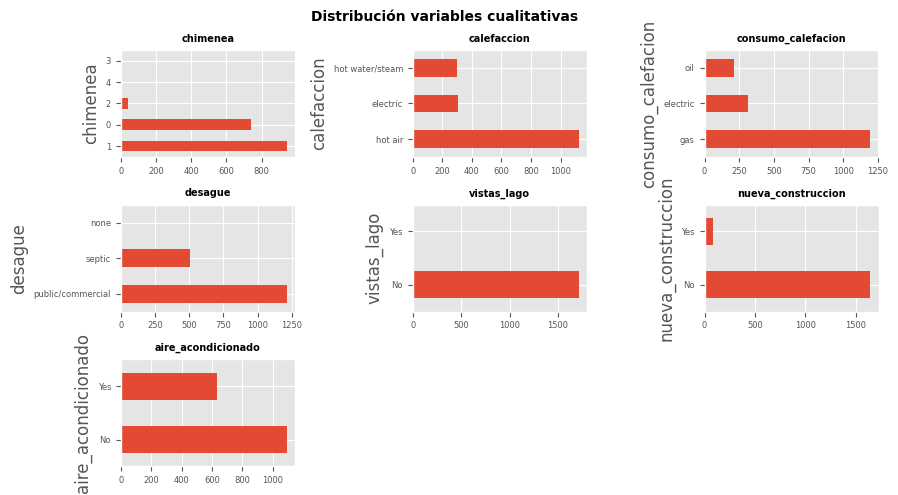

In [22]:
# Gráfico para cada variable cualitativa
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    datos[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");

Si alguno de los niveles de una variable cualitativa tiene muy pocas observaciones en comparación a los otros niveles, puede ocurrir que, durante la validación cruzada o bootstrapping, algunas particiones no contengan ninguna observación de dicha clase (varianza cero), lo que puede dar lugar a errores. En estos casos, suele ser conveniente:

* Eliminar las observaciones del grupo minoritario si es una variable multiclase.
* Eliminar la variable si solo tiene dos niveles.
* Agrupar los niveles minoritarios en un único grupo.
* Asegurar que, en la creación de las particiones, todos los grupos estén representados en cada una de ellas.

Para este caso, hay que tener precaución con la variable chimenea. Se unifican los niveles de 2, 3 y 4 en un nuevo nivel llamado "2_mas".

In [23]:
datos.chimenea.value_counts().sort_index()

chimenea
0    740
1    942
2     42
3      2
4      2
Name: count, dtype: int64

In [24]:
# diccionario con los casos a reemplazar
dic_replace = {'2': "2_mas",
               '3': "2_mas",
               '4': "2_mas"}

datos['chimenea'] = (
    datos['chimenea']
    .map(dic_replace) 
    .fillna(datos['chimenea'])
)

In [25]:
datos.chimenea.value_counts().sort_index()

chimenea
0        740
1        942
2_mas     46
Name: count, dtype: int64

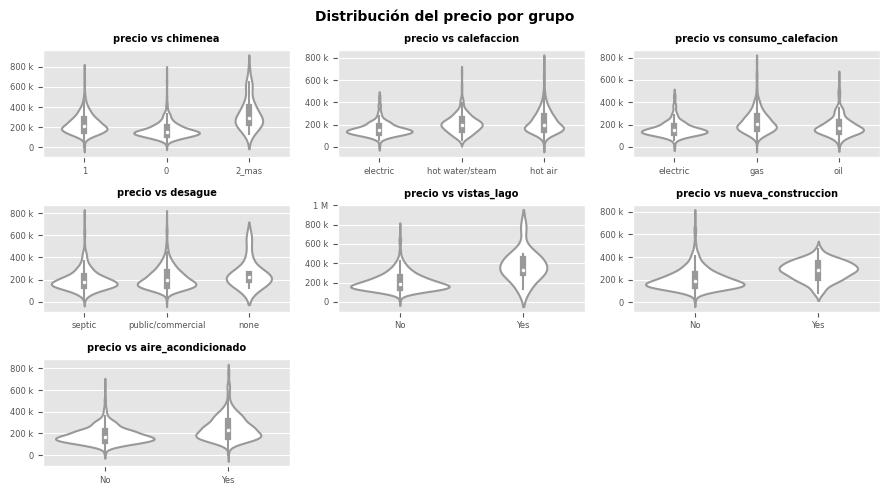

In [26]:
# Gráfico relación entre el precio y cada cada variables cualitativas
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'precio',
        data  = datos,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del precio por grupo', fontsize = 10, fontweight = "bold");

## División train y test

Evaluar la capacidad predictiva de un modelo consiste en comprobar cómo de próximas son sus predicciones a los verdaderos valores de la variable respuesta. Para poder cuantificarlo de forma correcta, se necesita disponer de un conjunto de observaciones, de las que se conozca la variable respuesta, pero que el modelo no haya "visto", es decir, que no hayan participado en su ajuste. Con esta finalidad, se dividen los datos disponibles en un conjunto de entrenamiento y un conjunto de test. El tamaño adecuado de las particiones depende en gran medida de la cantidad de datos disponibles y la seguridad que se necesite en la estimación del error, 80%-20% suele dar buenos resultados. El reparto debe hacerse de forma aleatoria o aleatoria-estratificada.

In [28]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop('precio', axis = 'columns'), # X
                                        datos['precio'], # y
                                        train_size   = 0.8, # % de datos para la particion de datos de entrenamiento
                                        random_state = 1234,
                                        shuffle      = True
                                    )

Es importante verificar que la distribución de la variable respuesta es similar en el conjunto de entrenamiento y en el de test. Para asegurar que esto se cumple, la función train_test_split() de scikit-learn permite, en problemas de clasificación, identificar con el argumento stratify la variable en base a la cual hacer el reparto.

Este tipo de reparto estratificado asegura que el conjunto de entrenamiento y el de test sean similares en cuanto a la variable respuesta, sin embargo, no garantiza que ocurra lo mismo con los predictores. Por ejemplo, en un set de datos con 100 observaciones, un predictor binario que tenga 90 observaciones de un grupo y solo 10 de otro, tiene un alto riesgo de que, en alguna de las particiones, el grupo minoritario no tenga representantes. Si esto ocurre en el conjunto de entrenamiento, algunos algoritmos darán error al aplicarlos al conjunto de test, ya que no entenderán el valor que se les está pasando. Este problema puede evitarse eliminando variables con varianza próxima a cero (ver más adelante).

In [29]:
print("Partición de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición de entrenamento
-----------------------
count      1382.000000
mean     211436.516643
std       96846.639129
min       10300.000000
25%      145625.000000
50%      190000.000000
75%      255000.000000
max      775000.000000
Name: precio, dtype: float64


In [30]:
print("Partición de test")
print("-----------------------")
print(y_test.describe())

Partición de test
-----------------------
count       346.000000
mean     214084.395954
std      104689.155889
min        5000.000000
25%      139000.000000
50%      180750.000000
75%      271750.000000
max      670000.000000
Name: precio, dtype: float64


## Preprocesado

El preprocesado engloba todas aquellas transformaciones realizadas sobre los datos con el objetivo que puedan ser interpretados por el algoritmo de machine learning lo más eficientemente posible. Todo preprocesado de datos debe aprenderse con las observaciones de entrenamiento y luego aplicarse al conjunto de entrenamiento y al de test. Esto es muy importante para no violar la condición de que ninguna información procedente de las observaciones de test participe o influya en el ajuste del modelo. Este principio debe aplicarse también si se emplea validación cruzada (ver más adelante). En tal caso, el preprocesado debe realizarse dentro de cada iteración de validación, para que las estimaciones que se hacen con cada partición de validación no contengan información del resto de particiones. Aunque no es posible crear un único listado, a continuación se resumen algunos de los pasos de preprocesado que más se suelen necesitar.

### Imputación de valores ausentes

La gran mayoría de algoritmos no aceptan observaciones incompletas, por lo que, cuando el set de datos contiene valores ausentes, se puede:

* Eliminar aquellas observaciones que estén incompletas.
* Eliminar aquellas variables que contengan valores ausentes.
* Tratar de estimar los valores ausentes empleando el resto de información disponible (imputación).

Las primeras dos opciones, aunque sencillas, suponen perder información. La eliminación de observaciones solo puede aplicarse cuando se dispone de muchas y el porcentaje de registros incompletos es muy bajo. En el caso de eliminar variables, el impacto dependerá de cuánta información aporten dichas variables al modelo. Cuando se emplea la imputación, es muy importante tener en cuenta el riesgo que se corre al introducir valores en predictores que tengan mucha influencia en el modelo. Supóngase un estudio médico en el que, cuando uno de los predictores es positivo, el modelo predice casi siempre que el paciente está sano. Para un paciente cuyo valor de este predictor se desconoce, el riesgo de que la imputación sea errónea es muy alto, por lo que es preferible obtener una predicción basada únicamente en la información disponible. Esta es otra muestra de la importancia que tiene que el analista conozca el problema al que se enfrenta y pueda así tomar la mejor decisión.

El módulo sklearn.impute incorpora varios métodos de imputación distintos:

* SimpleImputer: permite imputaciones empleando un valor constante o un estadístico (media, mediana, valor más frecuente) de la misma columna en la que se encuentra el valor ausente.
* IterativeImputer: permite imputar el valor de una columna teniendo en cuenta el resto de columnas. En concreto, se trata de un proceso iterativo en el que, en cada iteración, una de las variables se emplea como variable respuesta y el resto como predictores. Una vez obtenido el modelo, se emplea para predecir las posiciones vacías de esa variable. Este proceso se lleva a cabo con cada variable y se repite el ciclo max_iter veces para ganar estabilidad. La implementación de sklearn.impute.IterativeImputer permite que se emplee casi cualquiera de sus algoritmos para crear los modelos de imputación (KNN, RandomForest, GradientBoosting...).
* KNNImputer: es un caso concreto de IterativeImputer en el que se emplea k-Nearest Neighbors como algoritmo de imputación.

A pesar de ser un método muy utilizado, imputar utilizando KNN presenta dos problemas: su coste computacional elevado hace que solo sea aplicable en conjuntos de datos de tamaño pequeño o moderado. Si hay variables categóricas, debido a la dificultad de medir "distancias" en este contexto, puede dar lugar a resultados poco realistas. Por estas dos razones, es más recomendable utilizar un modelo tipo Random Forest IterativeImputer(predictor = RandomForestRegressor()).

Con el argumento add_indicator=True se crea automáticamente una nueva columna en la que se indica con el valor 1 qué valores han sido imputados. Esto puede ser útil tanto para identificar las observaciones en las que se ha realizado alguna imputación como para utilizarla como un predictor más en el mode

### Pipeline y ColumnTransformer

Las clases ColumnTransformer y make_column_transformer del módulo sklearn.compose permiten combinar múltiples transformaciones de preprocesado, especificando a qué columnas se aplica cada una. Como todo transformer, tiene un método de entrenamiento (fit) y otro de transformación (transform) . Esto permite que el aprendizaje de las transformaciones se haga únicamente con observaciones de entrenamiento, y se puedan aplicar después a cualquier conjunto de datos. La idea detrás de este módulo es la siguiente:

* Definir todas las transformaciones (escalado, selección, filtrado...) que se desea aplicar y a qué columnas ColumnTransformer(). La selección de columnas puede hacerse por: nombre. índice, máscara booleana, slice, patrón regex, por tipo de columna o con las funciones de selección make_column_selector.
* Aprender los parámetros necesarios para dichas transformaciones con las observaciones de entrenamiento .fit().
* Aplicar las transformaciones aprendidas a cualquier conjunto de datos .transform().

In [32]:
# Selección de las variables por tipo
# ==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
# columnas cualitativas. Para mantener las columnas a las que no se les aplica 
# ninguna transformación se tiene que indicar remainder='passthrough'.
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list() # vars numericas
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list() # vars categoricas

preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols), # vars numericas las voy estadarizar
                    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)], # las vars categoricas voy onehotencoding
                remainder='passthrough')

Una vez que se ha definido el objeto ColumnTransformer, con el método fit() se aprenden las transformaciones con los datos de entrenamiento y se aplican a los dos conjuntos con transform().

In [33]:
X_train_prep = preprocessor.fit_transform(X_train) # entrenar y aplicar
X_test_prep  = preprocessor.transform(X_test) # aplicar

Por defecto, el resultado devuelto por ColumnTransformer es un numpy array, por lo que se pierden los nombres de las columnas. Suele ser interesante poder inspeccionar cómo queda el set de datos tras el preprocesado en formato dataframe. Por defecto, OneHotEncoder ordena las nuevas columnas de izquierda a derecha por orden alfabético.

In [36]:
# Convertir el output en dataframe y añadir el nombre de las columnas
# ==============================================================================
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_cols)
nombre_columnas = np.concatenate([numeric_cols, encoded_cat])
X_train_prep = preprocessor.transform(X_train)
X_train_prep = pd.DataFrame(X_train_prep, columns=nombre_columnas)
X_train_prep.head(3)

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones,chimenea_0,chimenea_1,...,consumo_calefacion_oil,desague_none,desague_public/commercial,desague_septic,vistas_lago_No,vistas_lago_Yes,nueva_construccion_No,nueva_construccion_Yes,aire_acondicionado_No,aire_acondicionado_Yes
0,-0.061549,0.301597,-0.195148,1.320467,0.826826,1.011039,0.905289,2.128665,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.195573,-0.407560,-0.277982,0.194931,0.730235,1.011039,1.663079,1.264569,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.072475,-0.478476,-0.892092,-0.064313,-1.877728,1.011039,0.147500,-0.463623,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


A partir de las versión scikit-learn 0.23 se puede crear una representación interactiva de un objeto pipeline.

In [37]:
from sklearn import set_config
set_config(display='diagram')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', StandardScaler(),
                                 ['metros_totales', 'antiguedad',
                                  'precio_terreno', 'metros_habitables',
                                  'universitarios', 'dormitorios', 'banyos',
                                  'habitaciones']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['chimenea', 'calefaccion',
                                  'consumo_calefacion', 'desague',
                                  'vistas_lago', 'nueva_construccion',
                                  'aire_acondicionado'])])

## Ajustar un modelo

El siguiente paso tras definir los datos de entrenamiento, es seleccionar el algoritmo que se va a emplear. En scikit-learn, esto se hace mediante la creación de un objeto estimator. En concreto, este objeto almacena el nombre del algoritmo, sus parámetros e hiperparámetros y contiene los métodos fit(X, y) y predict(T) que le permiten aprender de los datos y predecir nuevas observaciones. El siguiente listado contiene todos los algoritmos implementados en scikit-learn.

### entrenamiento

#### regresion lineal

In [38]:
# Creación del modelo
# ==============================================================================
modelo_rl = LinearRegression() # ols
modelo_rl.fit(X_train_prep, y = y_train)  # ajuste de modelo 

LinearRegression()

In [39]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo_rl.intercept_)
print("Coeficiente:", list(zip(datos.columns, modelo_rl.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo_rl.score(X_train_prep, y_train))

Intercept: 248849.13049545255
Coeficiente: [('precio', 4000.8754157931676), ('metros_totales', -3356.3179069843864), ('antiguedad', 31790.40660474676), ('precio_terreno', 41609.481379145866), ('metros_habitables', -322.42719981657456), ('universitarios', -6108.530665738215), ('dormitorios', 17411.516789869253), ('chimenea', 6840.055953136913), ('banyos', -2238.620607060309), ('habitaciones', -5608.4203214697645), ('calefaccion', 7847.040928530093), ('consumo_calefacion', 4020.4005406263395), ('desague', 5423.936914262604), ('vistas_lago', -9444.337454888904), ('nueva_construccion', -6324.2325439971455), ('aire_acondicionado', 5827.952335751282)]
Coeficiente de determinación R^2: 0.6648081092409983


In [40]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo_rl.predict(X = X_test_prep) # prediccion
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


[112433.1136242  185108.2613091  168945.05036788]

El error (rmse) de test es: 65362.38340945327


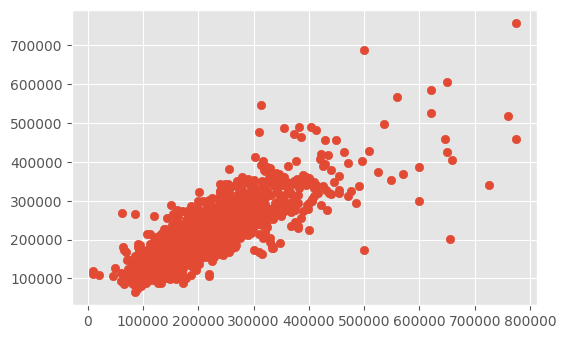

In [41]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo_rl.predict(X_train_prep)
observado = y_train

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

plt.scatter(observado,predicciones)
plt.show()

#### arbol de decision

In [42]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo_cart = DecisionTreeRegressor(
            max_depth         = 3, # hiperparametros
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo_cart.fit(X_train_prep, y_train)

DecisionTreeRegressor(max_depth=3, random_state=123)

Profundidad del árbol: 3
Número de nodos terminales: 8


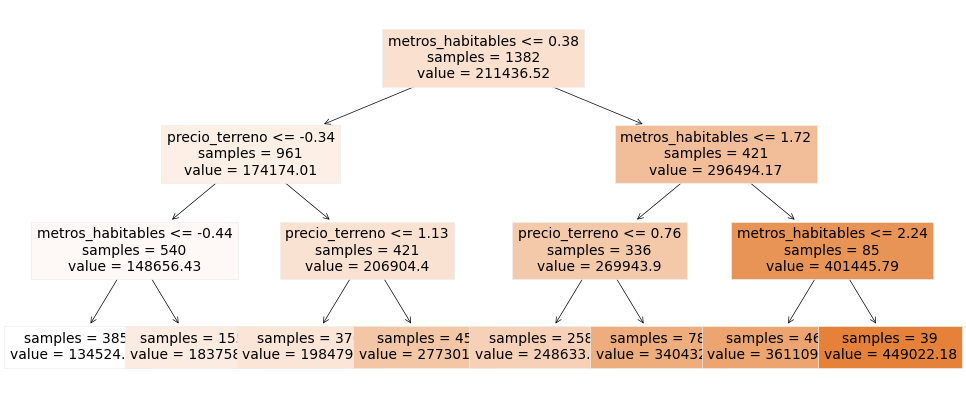

In [43]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo_cart.get_depth()}")
print(f"Número de nodos terminales: {modelo_cart.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo_cart,
            feature_names = datos.drop(columns = "precio").columns,
            class_names   = 'precio',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [44]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo_cart.predict(X = X_test_prep)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[134524.34285714 183758.69677419 134524.34285714]

El error (rmse) de test es: 69222.77635474308


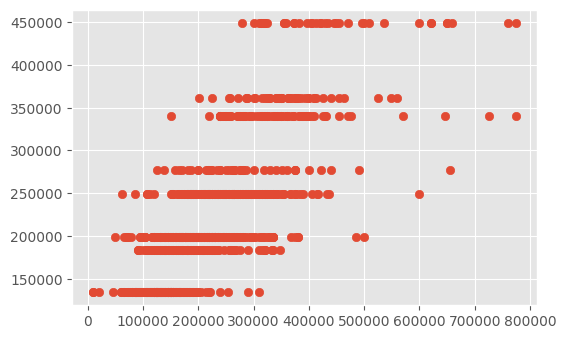

In [45]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo_cart.predict(X_train_prep)
observado = y_train

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

plt.scatter(observado,predicciones)
plt.show()

### Random Forest

In [46]:
# Creación del modelo
# ==============================================================================
modelo_rf = RandomForestRegressor(
            n_estimators = 10, # cantidad de arboles
            criterion    = 'friedman_mse',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1, # jobs van a ser los nucles en los que puedo paralelizar los modelos (-1 escoge el maximo de executors)
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
modelo_rf.fit(X_train_prep, y_train)

RandomForestRegressor(criterion='friedman_mse', max_features='auto',
                      n_estimators=10, n_jobs=-1, random_state=123)

In [47]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo_rf.predict(X = X_test_prep)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[108230. 131290. 110440.]

El error (rmse) de test es: 65107.348431708684


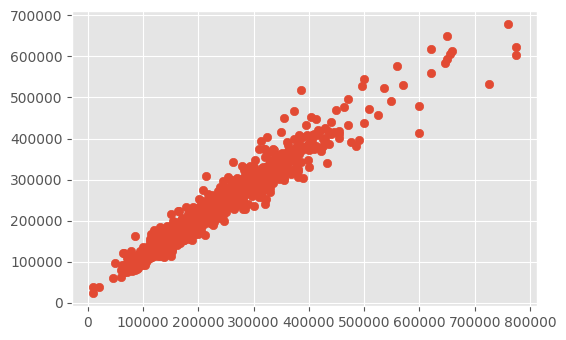

In [48]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo_rf.predict(X_train_prep)
observado = y_train

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

plt.scatter(observado,predicciones)
plt.show()

### validacion

#### validacion cruzada

In [49]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = DecisionTreeRegressor(),
                X         = X_train_prep,
                y         = y_train,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.009031,0.002003,0.464324,1.0,-78004.061976,-0.0
1,0.009193,0.001003,0.519473,1.0,-71689.803367,-0.0
2,0.008543,0.002000,0.159823,1.0,-81189.059496,-0.0
3,0.008005,0.001505,0.185512,1.0,-80115.725091,-0.0
4,0.008001,0.001175,0.464012,1.0,-69403.227332,-0.0
5,0.008057,0.002000,0.480031,1.0,-80039.409236,-0.0
6,0.009502,0.001000,0.392342,1.0,-70108.867712,-0.0
7,0.008508,0.001031,0.304875,1.0,-82538.788720,-0.0
8,0.008588,0.001000,0.424098,1.0,-72442.759944,-0.0
9,0.007570,0.001533,0.177497,1.0,-77927.226798,-0.0


#### Grid Search basado en validacion cruzada

In [50]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20]
             }

In [51]:
# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV( # grilla de busqueda de hiperparametros
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'r2',
        n_jobs     = multiprocessing.cpu_count() - 1, # seleccionar la cantidad de nucleos máxima que diospongo para paralelizar
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

In [52]:
# ajuste
grid.fit(X = X_train_prep, y = y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=123),
             estimator=RandomForestRegressor(random_state=123), n_jobs=11,
             param_grid={'max_depth': [None, 3, 10, 20],
                         'max_features': [5, 7, 9], 'n_estimators': [150]},
             return_train_score=True, scoring='r2')

In [53]:

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
11,20,9,150,0.675694,0.042465,0.955760,0.002024
2,None,9,150,0.675416,0.042181,0.956086,0.001978
1,None,7,150,0.675366,0.042030,0.955777,0.001976
10,20,7,150,0.674756,0.041858,0.955683,0.002017


Valor óptimo de n_estimators: 141


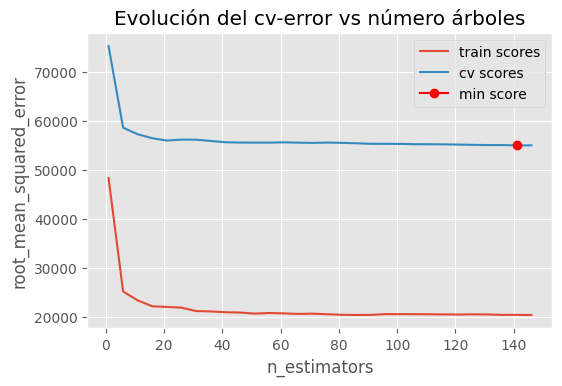

In [54]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'friedman_mse',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train_prep, y_train)
    predicciones = modelo.predict(X = X_train_prep)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train_prep,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Acorde a las dos métricas utilizadas, el valor óptimo de max_features está cerca de 140.

In [56]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_ #$ sacar el mejor modelo
predicciones = modelo.predict(X = X_test_prep) # realizo prdiccion
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 62923.72701867452


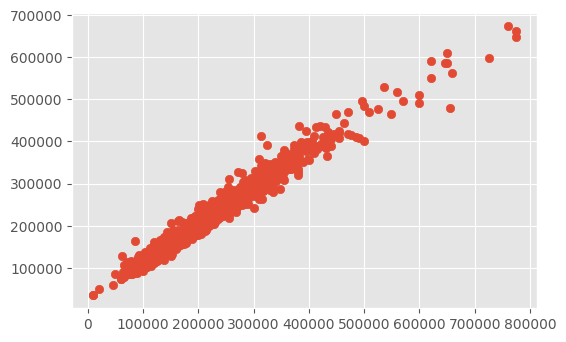

In [57]:
# Predicciones 
# ==============================================================================
predicciones = modelo_final.predict(X_train_prep)
observado = y_train

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

plt.scatter(observado,predicciones)
plt.show()

## Clustering

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

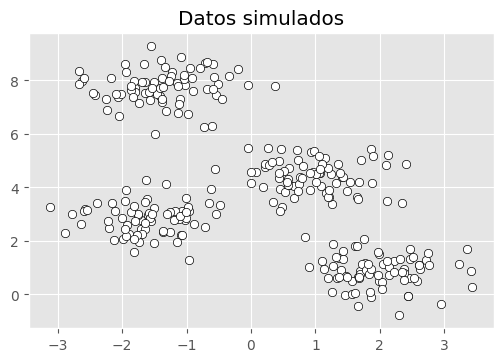

In [2]:
# Simulación de datos porque no tenemos datos (podríamos cargarlos)
# ==============================================================================
X, y = make_blobs(
        n_samples    = 300, 
        n_features   = 2, 
        centers      = 4, 
        cluster_std  = 0.60, 
        shuffle      = True, 
        random_state = 0
       )

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1], 
    c = 'white',
    marker    = 'o',
    edgecolor = 'black', 
)
ax.set_title('Datos simulados');

***Modelo Kmeans***

Con la clase sklearn.cluster.KMeans de Scikit-Learn se pueden entrenar modelos de clustering utilizando el algoritmo k-means. Entre sus parámetros destacan:

* n_clusters: determina el número  K
  de clusters que se van a generar.
* init: estrategia para asignar los centroides iniciales. Por defecto se emplea 'k-means++', una estrategia que trata de alejar los centroides lo máximo posible facilitando la convergencia. Sin embargo, esta estrategia puede ralentizar el proceso cuando hay muchos datos, si esto ocurre, es mejor utilizar 'random'.
* n_init: determina el número de veces que se va a repetir el proceso, cada vez con una asignación aleatoria inicial distinta. Es recomendable que este último valor sea alto, entre 10-25, para no obtener resultados subóptimos debido a una iniciación poco afortunada del proceso.
* max_iter: número máximo de iteraciones permitidas.
* random_state: semilla para garantizar la reproducibilidad de los resultados.

In [3]:
# Escalado de datos (procesamiento a datos numericos)
# ==============================================================================
X_scaled = scale(X)

In [4]:
# Modelo
# ==============================================================================

modelo_kmeans = KMeans(
    n_clusters=4, 
    n_init=25, 
    random_state=123
    ) #objeto modelo 
modelo_kmeans.fit(X=X_scaled)# ajuste del modelo

KMeans(n_clusters=4, n_init=25, random_state=123)

El objeto devuelto por KMeans() contiene entre otros datos: la media de cada una de las variables para cada cluster (cluster_centers_), es decir, los centroides. Un vector indicando a qué cluster se ha asignado cada observación (.labels_) y la suma total de cuadrados internos de todos los clusters (.inertia_).

***Número de clusters***

Al tratarse de una simulación, se conoce el verdadero número de grupos (4) y a cuál de ellos pertenece cada observación. Esto no sucede en la mayoría de casos prácticos, pero es útil como ejemplo ilustrativo cómo funciona K-means.

In [5]:
# Clasificación con el modelo kmeans
# ==============================================================================
y_predict = modelo_kmeans.predict(X=X_scaled)

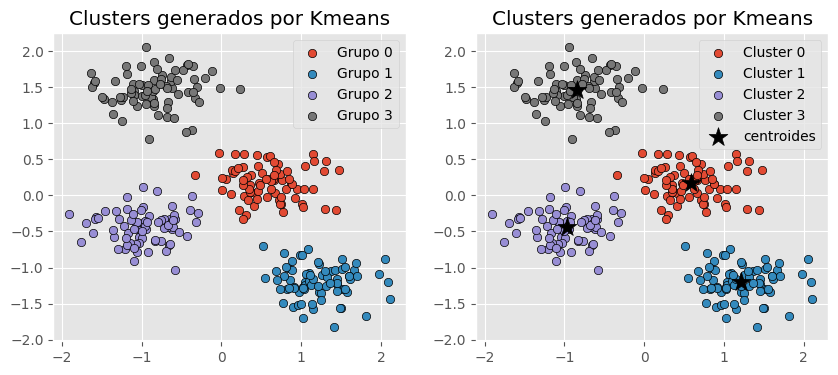

In [6]:
# Representación gráfica: grupos originales vs clusters creados
# ==============================================================================
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Grupos originales
for i in np.unique(y):
    ax[0].scatter(
        x = X_scaled[y == i, 0],
        y = X_scaled[y == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Grupo {i}"
    )
    
ax[0].set_title('Clusters generados por Kmeans')
ax[0].legend();

for i in np.unique(y_predict):
    ax[1].scatter(
        x = X_scaled[y_predict == i, 0],
        y = X_scaled[y_predict == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Cluster {i}"
    )
    
ax[1].scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1], 
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[1].set_title('Clusters generados por Kmeans')
ax[1].legend();

In [7]:
# Matriz de confusión: grupos originales vs clusters creados
# ==============================================================================
pd.crosstab(y, y_predict, dropna=False, rownames=['grupo_real'], colnames=['cluster'])

cluster,0,1,2,3
grupo_real,,,,
0,75,0,0,0
1,0,75,0,0
2,0,0,75,0
3,0,0,0,75


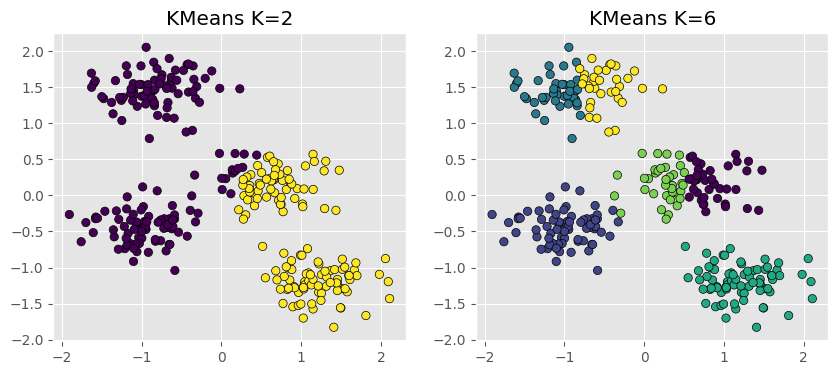

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Resultados para K = 2
# ==============================================================================
y_predict = KMeans(n_clusters=2, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[0].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[0].set_title('KMeans K=2');

# Resultados para K = 6
# ==============================================================================
y_predict = KMeans(n_clusters=6, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[1].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[1].set_title('KMeans K=6');

Una forma sencilla de estimar el número K óptimo de clusters cuando no se dispone de esta información, es aplicar el algoritmo de K-means para un rango de valores de K e identificar aquel valor a partir del cual la reducción en la suma total de varianza intra-cluster (inertia) deja de ser sustancial. A esta estrategia se la conoce como método del codo o elbow method.

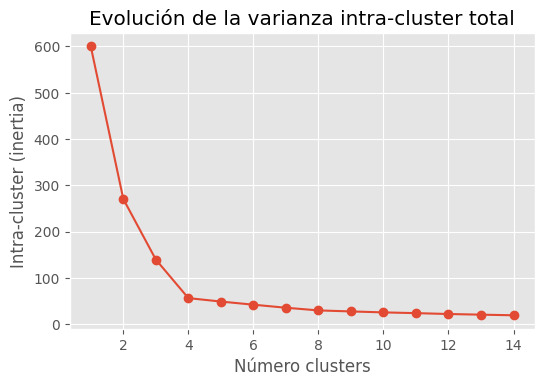

In [9]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(X_scaled)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

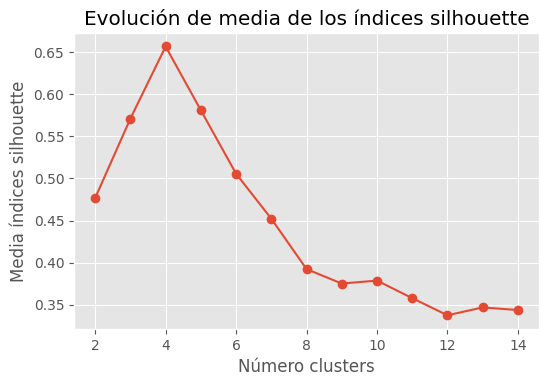

In [10]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

## Explorando

## Bibliografía


* https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html
* https://www.cienciadedatos.net/documentos/py08_random_forest_python.html
* https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html
* https://www.cienciadedatos.net/documentos/py20-clustering-con-python.html